In [195]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model, metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from statistics import mean
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
%matplotlib inline

In [196]:
data_big=pd.read_csv('C:/Users/salma/Desktop/uni/machine learning/class_data.csv')

In [197]:
data_big.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [31]:
# X, X_test, y, y_test =train_test_split(data,
#                                       data['isFraud'],
#                                       test_size=0.2,
#                                       random_state=0)
# X_train, X_CV, y_train, y_CV =train_test_split(X,y,
#                                                test_size=0.25,
#                                                random_state=0)

# print(X_train.shape,X_test.shape,X_CV.shape)


(3817572, 11) (1272524, 11) (1272524, 11)


In [198]:
data=data_big.sample(n=50000)
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2314906,188,PAYMENT,6557.76,C1159974104,338419.13,331861.37,M627884075,0.00,0.00,0,0
5810578,401,PAYMENT,4889.39,C1145017828,203845.53,198956.14,M917391796,0.00,0.00,0,0
4154670,303,CASH_OUT,156446.23,C545116697,0.00,0.00,C1190796381,1495731.76,1652177.99,0,0
4102248,301,TRANSFER,1580384.91,C1969077210,99617.99,0.00,C1290604890,2256928.87,3837313.78,0,0
4825932,346,CASH_IN,66297.83,C31686925,141816.00,208113.83,C1112575669,674098.54,607800.71,0,0


In [199]:
print(data['type'].unique())
data['nameOrig'].count()

['PAYMENT' 'CASH_OUT' 'TRANSFER' 'CASH_IN' 'DEBIT']


50000

In [200]:
#data.groupby('type', group_keys=False).apply(lambda x: x.sample(8))
data.drop(['nameOrig','nameDest'],axis=1,inplace=True)
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2314906,188,PAYMENT,6557.76,338419.13,331861.37,0.00,0.00,0,0
5810578,401,PAYMENT,4889.39,203845.53,198956.14,0.00,0.00,0,0
4154670,303,CASH_OUT,156446.23,0.00,0.00,1495731.76,1652177.99,0,0
4102248,301,TRANSFER,1580384.91,99617.99,0.00,2256928.87,3837313.78,0,0
4825932,346,CASH_IN,66297.83,141816.00,208113.83,674098.54,607800.71,0,0


In [201]:
type_new = pd.get_dummies(data['type'],drop_first=True)

In [202]:
data = pd.concat([data,type_new],axis=1)

In [203]:
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
2314906,188,PAYMENT,6557.76,338419.13,331861.37,0.00,0.00,0,0,0,0,1,0
5810578,401,PAYMENT,4889.39,203845.53,198956.14,0.00,0.00,0,0,0,0,1,0
4154670,303,CASH_OUT,156446.23,0.00,0.00,1495731.76,1652177.99,0,0,1,0,0,0
4102248,301,TRANSFER,1580384.91,99617.99,0.00,2256928.87,3837313.78,0,0,0,0,0,1
4825932,346,CASH_IN,66297.83,141816.00,208113.83,674098.54,607800.71,0,0,0,0,0,0


In [204]:
data_X = data[['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFlaggedFraud','CASH_OUT','DEBIT','PAYMENT','TRANSFER']]
data_y = data['isFraud']


In [205]:
scaler = StandardScaler()
scaler.fit(data_X)
scaled_feature = scaler.transform(data_X)

In [206]:
data_scaled = pd.DataFrame(scaled_feature,columns= ['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFlaggedFraud','CASH_OUT','DEBIT','PAYMENT','TRANSFER'])
data_scaled.head()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,-0.389938,-0.297687,-0.170489,-0.177854,-0.339710,-0.351290,-0.004472,-0.736898,-0.082006,1.401434,-0.301722
1,1.105742,-0.300573,-0.216840,-0.223082,-0.339710,-0.351290,-0.004472,-0.736898,-0.082006,1.401434,-0.301722
2,0.417589,-0.038478,-0.287049,-0.290786,0.129842,0.130678,-0.004472,1.357039,-0.082006,-0.713555,-0.301722
3,0.403545,2.424009,-0.252738,-0.290786,0.368803,0.768118,-0.004472,-0.736898,-0.082006,-0.713555,3.314311
4,0.719533,-0.194376,-0.238204,-0.219966,-0.128092,-0.173984,-0.004472,-0.736898,-0.082006,-0.713555,-0.301722


In [207]:
X, X_test, y, y_test =train_test_split(data_scaled,
                                      data_y,
                                      test_size=0.2,
                                      random_state=0)
X_train, X_CV, y_train, y_CV =train_test_split(X,y,
                                               test_size=0.25,
                                               random_state=0)

print(X_train.shape,X_test.shape,X_CV.shape)


(30000, 11) (10000, 11) (10000, 11)


In [208]:
y

3398551    0
426890     0
357434     0
1834615    0
4324695    0
          ..
3053811    0
5028322    0
5903354    0
5625577    0
5297794    0
Name: isFraud, Length: 40000, dtype: int64

In [240]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=100000)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1) 
model_score= []
confusionmatrix=[]
Accuracy=[]
Precision=[]
Recall=[]

In [241]:
for train_index, test_index in skf.split(X ,y): 
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index] 
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index] 
    logreg.fit(X_train_fold, y_train_fold) 
    y_pred = logreg.predict(X_test_fold )
    cm = confusion_matrix(y_test_fold, y_pred)
    confusionmatrix.append(cm)
    accuracyscore= accuracy_score(y_test_fold, y_pred)
    Accuracy.append(accuracyscore)
    prec=metrics.precision_score(y_test_fold, y_pred)
    Precision.append(prec)
    rec=metrics.recall_score(y_test_fold, y_pred)
    Recall.append(rec)
    s=logreg.score(X_test_fold, y_test_fold)
    model_score.append(s)

In [242]:
print('Maximum Accuracy of the model',max(score)) 
print('Minimum Accuracy of the model:',min(score)) 
print('Overall Accuracy of the model:',mean(score))
print('confusion matrix: ',confusionmatrix)
print('Accuracy of the test',mean(Accuracy))
print('precision',mean(Precision))
print('recall', mean(Recall))

Maximum Accuracy of the model 0.9996
Minimum Accuracy of the model: 0.9988
Overall Accuracy of the model: 0.99908
confusion matrix:  [array([[3996,    0],
       [   1,    3]], dtype=int64), array([[3996,    0],
       [   3,    1]], dtype=int64), array([[3996,    0],
       [   4,    0]], dtype=int64), array([[3996,    0],
       [   2,    2]], dtype=int64), array([[3995,    0],
       [   5,    0]], dtype=int64), array([[3995,    0],
       [   3,    2]], dtype=int64), array([[3995,    0],
       [   5,    0]], dtype=int64), array([[3995,    0],
       [   3,    2]], dtype=int64), array([[3995,    0],
       [   5,    0]], dtype=int64), array([[3995,    0],
       [   5,    0]], dtype=int64)]
Accuracy of the test 0.9991
precision 0.5
recall 0.23


In [243]:
poly_features = PolynomialFeatures(degree=2)

X_2nd= poly_features.fit_transform(X)


In [244]:
for train_index, test_index in skf.split(X_2nd ,y): 
    X_train_fold, X_test_fold = X_2nd[train_index], X_2nd[test_index] 
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index] 
    logreg.fit(X_train_fold, y_train_fold) 
    y_pred = logreg.predict(X_test_fold)
    cm = confusion_matrix(y_test_fold, y_pred)
    confusionmatrix.append(cm)
    accuracyscore= accuracy_score(y_test_fold, y_pred)
    Accuracy.append(accuracyscore)
    prec=metrics.precision_score(y_test_fold, y_pred)
    Precision.append(prec)
    s=logreg.score(X_test_fold, y_test_fold)
    model_score.append(s)
    rec=metrics.recall_score(y_test_fold, y_pred)
    Recall.append(rec)

In [245]:
print('Maximum Accuracy of the model',max(score)) 
print('Minimum Accuracy of the model:',min(score)) 
print('Overall Accuracy of the model:',mean(score))
print('confusion matrix: ',confusionmatrix)
print('Accuracy of the test',mean(Accuracy))
print('precision',mean(Precision))
print('recall', mean(Recall))

Maximum Accuracy of the model 0.9996
Minimum Accuracy of the model: 0.9988
Overall Accuracy of the model: 0.99908
confusion matrix:  [array([[3996,    0],
       [   1,    3]], dtype=int64), array([[3996,    0],
       [   3,    1]], dtype=int64), array([[3996,    0],
       [   4,    0]], dtype=int64), array([[3996,    0],
       [   2,    2]], dtype=int64), array([[3995,    0],
       [   5,    0]], dtype=int64), array([[3995,    0],
       [   3,    2]], dtype=int64), array([[3995,    0],
       [   5,    0]], dtype=int64), array([[3995,    0],
       [   3,    2]], dtype=int64), array([[3995,    0],
       [   5,    0]], dtype=int64), array([[3995,    0],
       [   5,    0]], dtype=int64), array([[3996,    0],
       [   1,    3]], dtype=int64), array([[3996,    0],
       [   3,    1]], dtype=int64), array([[3995,    1],
       [   4,    0]], dtype=int64), array([[3996,    0],
       [   2,    2]], dtype=int64), array([[3995,    0],
       [   5,    0]], dtype=int64), array([[399

In [246]:
poly_features = PolynomialFeatures(degree=3)

X_3rd= poly_features.fit_transform(X)

In [247]:
for train_index, test_index in skf.split(X_3rd ,y): 
    X_train_fold, X_test_fold = X_3rd[train_index], X_3rd[test_index] 
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index] 
    logreg.fit(X_train_fold, y_train_fold) 
    y_pred = logreg.predict(X_test_fold)
    cm = confusion_matrix(y_test_fold, y_pred)
    confusionmatrix.append(cm)
    accuracyscore= accuracy_score(y_test_fold, y_pred)
    Accuracy.append(accuracyscore)
    prec=metrics.precision_score(y_test_fold, y_pred)
    Precision.append(prec)
    s=logreg.score(X_test_fold, y_test_fold)
    model_score.append(s)
    rec=metrics.recall_score(y_test_fold, y_pred)
    Recall.append(rec)

In [248]:
print('Maximum Accuracy of the model',max(score)) 
print('Minimum Accuracy of the model:',min(score)) 
print('Overall Accuracy of the model:',mean(score))
print('confusion matrix: ',confusionmatrix)
print('Accuracy of the test',mean(Accuracy))
print('precision',mean(Precision))
print('recall', mean(Recall))

Maximum Accuracy of the model 0.9996
Minimum Accuracy of the model: 0.9988
Overall Accuracy of the model: 0.99908
confusion matrix:  [array([[3996,    0],
       [   1,    3]], dtype=int64), array([[3996,    0],
       [   3,    1]], dtype=int64), array([[3996,    0],
       [   4,    0]], dtype=int64), array([[3996,    0],
       [   2,    2]], dtype=int64), array([[3995,    0],
       [   5,    0]], dtype=int64), array([[3995,    0],
       [   3,    2]], dtype=int64), array([[3995,    0],
       [   5,    0]], dtype=int64), array([[3995,    0],
       [   3,    2]], dtype=int64), array([[3995,    0],
       [   5,    0]], dtype=int64), array([[3995,    0],
       [   5,    0]], dtype=int64), array([[3996,    0],
       [   1,    3]], dtype=int64), array([[3996,    0],
       [   3,    1]], dtype=int64), array([[3995,    1],
       [   4,    0]], dtype=int64), array([[3996,    0],
       [   2,    2]], dtype=int64), array([[3995,    0],
       [   5,    0]], dtype=int64), array([[399

In [250]:
poly_features = PolynomialFeatures(degree=4)

X_4th= poly_features.fit_transform(X)

In [251]:
for train_index, test_index in skf.split(X_4th ,y): 
    X_train_fold, X_test_fold = X_4th[train_index], X_4th[test_index] 
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index] 
    logreg.fit(X_train_fold, y_train_fold) 
    y_pred = logreg.predict(X_test_fold)
    cm = confusion_matrix(y_test_fold, y_pred)
    confusionmatrix.append(cm)
    accuracyscore= accuracy_score(y_test_fold, y_pred)
    Accuracy.append(accuracyscore)
    prec=metrics.precision_score(y_test_fold, y_pred)
    Precision.append(prec)
    s=logreg.score(X_test_fold, y_test_fold)
    model_score.append(s)
    rec=metrics.recall_score(y_test_fold, y_pred)
    Recall.append(rec)

In [252]:
print('Maximum Accuracy of the model',max(score)) 
print('Minimum Accuracy of the model:',min(score)) 
print('Overall Accuracy of the model:',mean(score))
print('confusion matrix: ',confusionmatrix)
print('Accuracy of the test',mean(Accuracy))
print('precision',mean(Precision))
print('recall', mean(Recall))

Maximum Accuracy of the model 0.9996
Minimum Accuracy of the model: 0.9988
Overall Accuracy of the model: 0.99908
confusion matrix:  [array([[3996,    0],
       [   1,    3]], dtype=int64), array([[3996,    0],
       [   3,    1]], dtype=int64), array([[3996,    0],
       [   4,    0]], dtype=int64), array([[3996,    0],
       [   2,    2]], dtype=int64), array([[3995,    0],
       [   5,    0]], dtype=int64), array([[3995,    0],
       [   3,    2]], dtype=int64), array([[3995,    0],
       [   5,    0]], dtype=int64), array([[3995,    0],
       [   3,    2]], dtype=int64), array([[3995,    0],
       [   5,    0]], dtype=int64), array([[3995,    0],
       [   5,    0]], dtype=int64), array([[3996,    0],
       [   1,    3]], dtype=int64), array([[3996,    0],
       [   3,    1]], dtype=int64), array([[3995,    1],
       [   4,    0]], dtype=int64), array([[3996,    0],
       [   2,    2]], dtype=int64), array([[3995,    0],
       [   5,    0]], dtype=int64), array([[399

In [ ]:
#The best model is the 4th degree polynomianl model with the highest precision and recall
#but as the dataset is huge even with the sampling it took a lot of time to apply regularization on it and then the kernel always die so
#reguralization is applied on the the 1st degree logistic regression as this was the only one that could run and output a graph

In [ ]:
lambdas = np.arange(0,3,step=0.01)
training_errors = [] 
CV_errors = [] 
for i in lambdas:
    clf = linear_model.Ridge (alpha = i,max_iter=1000)
    clf.fit(X, y)
#----------------------------------------------------------------------------------------------    
    training_predictions = clf.predict(X)
    training_mse = mean_squared_error(y, training_predictions)
    training_errors.append(training_mse)
#------------------------------------------------------------------------------------------------
    #CV_predictions = clf.predict(X_CV)
    CV_mse = (-1*cross_val_score(clf,X,y,scoring = 'neg_mean_squared_error', cv=4)).mean()
    #CV_mse = mean_squared_error(y_CV, CV_predictions)
    CV_errors.append(CV_mse)
#print("training errors: ",training_errors)
print("---------------------------------------------------------------------------------------------------")
#print("testing errors: ", testing_errors)

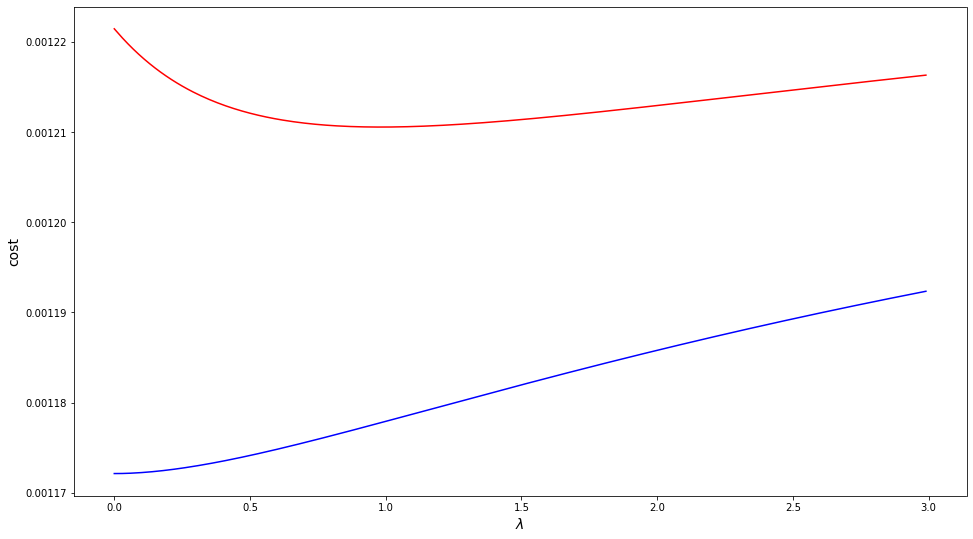

In [185]:
plt.figure(figsize=(16, 9))
plt.plot(lambdas, training_errors, label="train",color='blue')#bluee
plt.plot(lambdas, CV_errors, label="test",color='red')#redd
plt.xlabel("$\\lambda$", fontsize=14)
plt.ylabel("cost", fontsize=14)
plt.show()

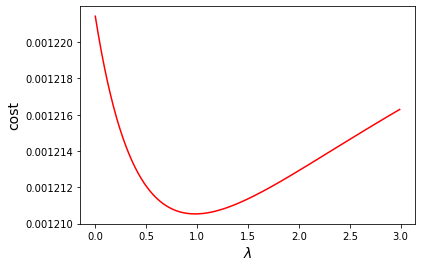

In [186]:
plt.figure()
plt.plot(lambdas, CV_errors, label="test",color='red')#redd
plt.xlabel("$\\lambda$", fontsize=14)
plt.ylabel("cost", fontsize=14)
plt.show()

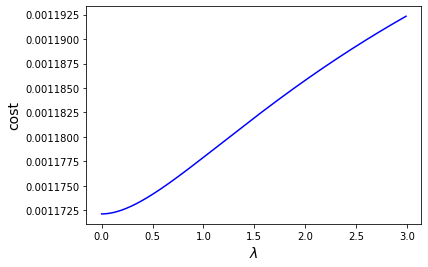

In [187]:
plt.figure()
plt.plot(lambdas, training_errors, label="train",color='blue')
plt.xlabel("$\\lambda$", fontsize=14)
plt.ylabel("cost", fontsize=14)
plt.show()

In [ ]:
#The best lambda is at 0.75